# Prediction of mortality and morbidity among hospitalized patients admitted with heart attack 

In [1]:
import warnings
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from sklearn.metrics import accuracy_score, log_loss,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from scipy.stats import reciprocal, uniform
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

def fxn():
    warnings.warn("deprecated", DeprecationWarning)
warnings.filterwarnings("ignore")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

[MLENS] backend: threading


# Load the dataset and Data cleaning 

In [2]:
# Data Source:'https://archive.ics.uci.edu/ml/machine-learning-databases/00579/MI.data'
columns_to_be_removed = ['ID']
df=pd.read_csv('Myocardial infarction complications Database.csv', sep=',').drop(columns_to_be_removed, axis = 'columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


Count of NaN's in each feature

In [3]:
print("NaN values in every row:", df.isnull().values.sum(axis=0))

NaN values in every row: [   8    0    4  106   73   51 1628    9    8  248   54   21   21   21
   21   21   21   21   18   18   18   18   18   18   18   11   10   10
    7    7    7    7    7 1076 1076  267  267   12   15   14   12   12
   12   83   80   80   72    1  152  152  152  152  152  152  115  115
  115  115  115  115  115  115  115  115  115  115  115  115  115  115
  115  115  115  115   10   10   10   10   10   10   10  369  371  375
  375  284  285 1696  125  203  126   16  108  128  657  686  677    9
    5  108  131   10  110  131   10   11   13   17   17   16   16    0
    0    0    0    0    0    0    0    0    0    0    0]


Impuding the missing values: Fill missing values with median column values

In [4]:
for i in df.columns:     
    df[i] = df[i].fillna(df[i].mean() )
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,1700.0,61.856974,11.233395,26.0,54.0,63.0,70.0,92.0
SEX,1700.0,0.626471,0.483883,0.0,0.0,1.0,1.0,1.0
INF_ANAM,1700.0,0.554835,0.835816,0.0,0.0,0.0,1.0,3.0
STENOK_AN,1700.0,2.316186,2.363227,0.0,0.0,2.0,5.0,6.0
FK_STENOK,1700.0,1.205286,1.018208,0.0,0.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...
DRESSLER,1700.0,0.044118,0.205417,0.0,0.0,0.0,0.0,1.0
ZSN,1700.0,0.231765,0.422084,0.0,0.0,0.0,0.0,1.0
REC_IM,1700.0,0.093529,0.291259,0.0,0.0,0.0,0.0,1.0
P_IM_STEN,1700.0,0.087059,0.282004,0.0,0.0,0.0,0.0,1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x29353e574c0>,
 'caps': [<matplotlib.lines.Line2D at 0x29353e57dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29353e50fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x29353e5c700>,
 'fliers': [<matplotlib.lines.Line2D at 0x29353e5cb80>,
 'means': []}

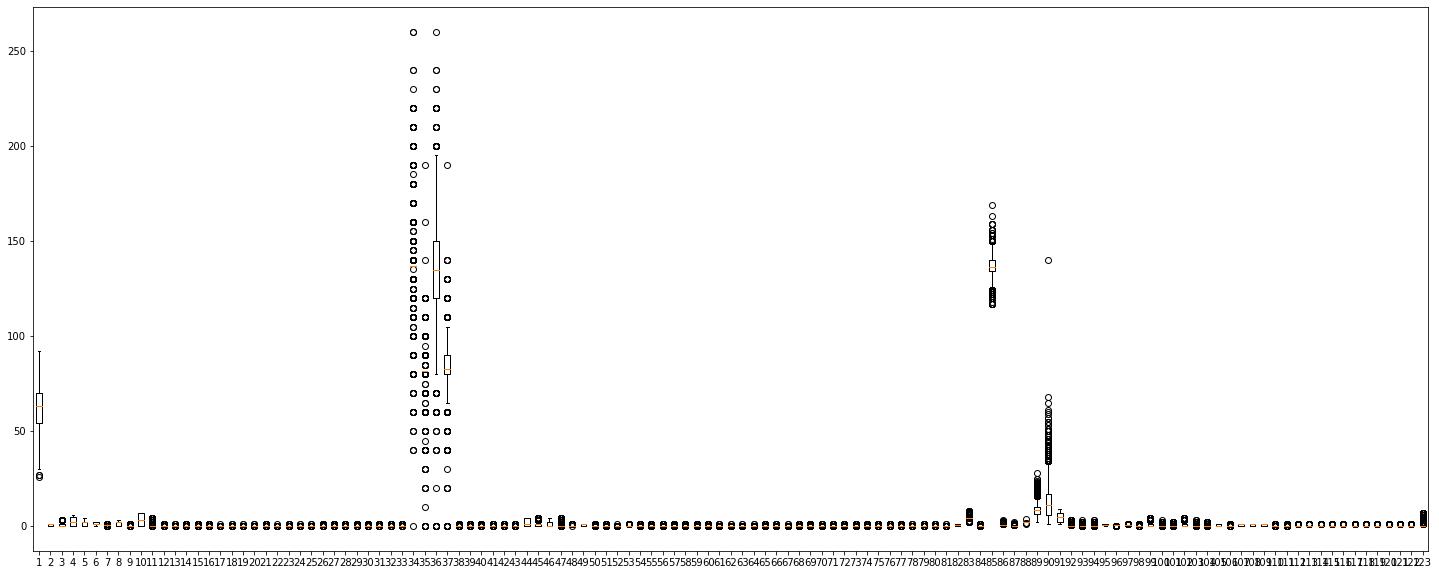

In [5]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.boxplot(df)

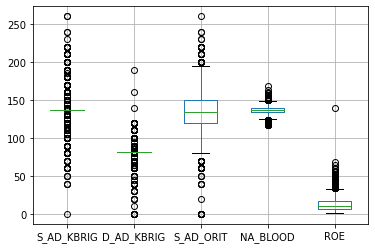

In [6]:
boxplot = df.boxplot(column=['S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'NA_BLOOD','ROE'])

# Exploratory Data Analysis

Correlation Matrix

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

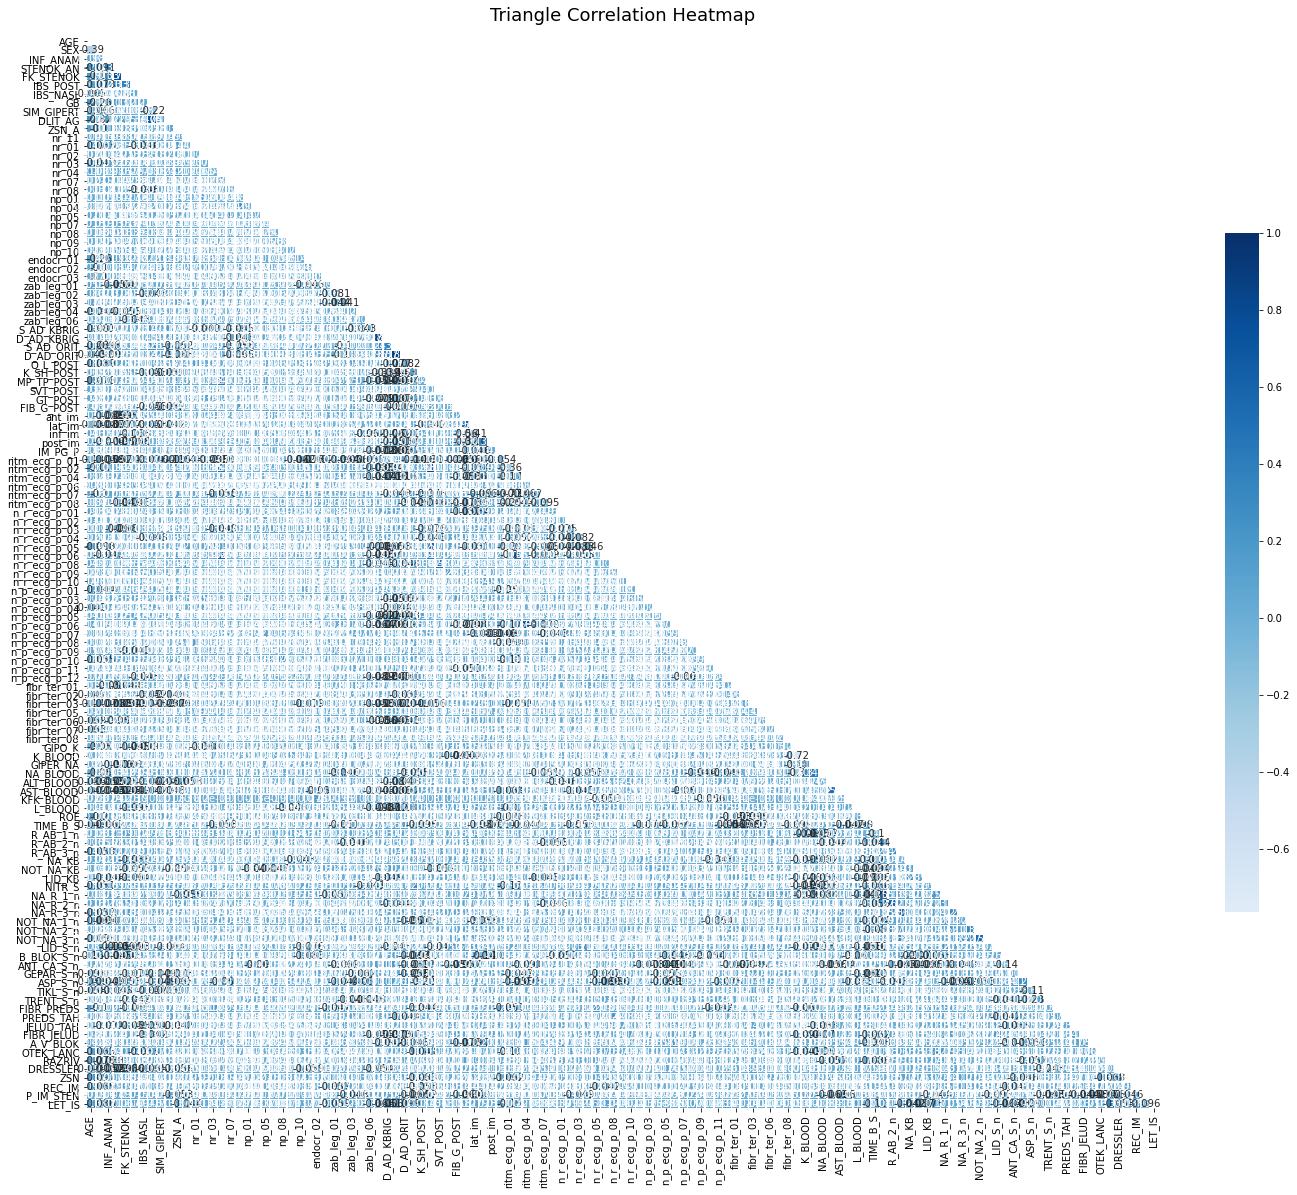

In [7]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(24, 25))
heatmap = sns.heatmap(df.corr(), mask=mask, vmax=1, annot=True, cmap='Blues',center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Correlation with the 3 target variables: 

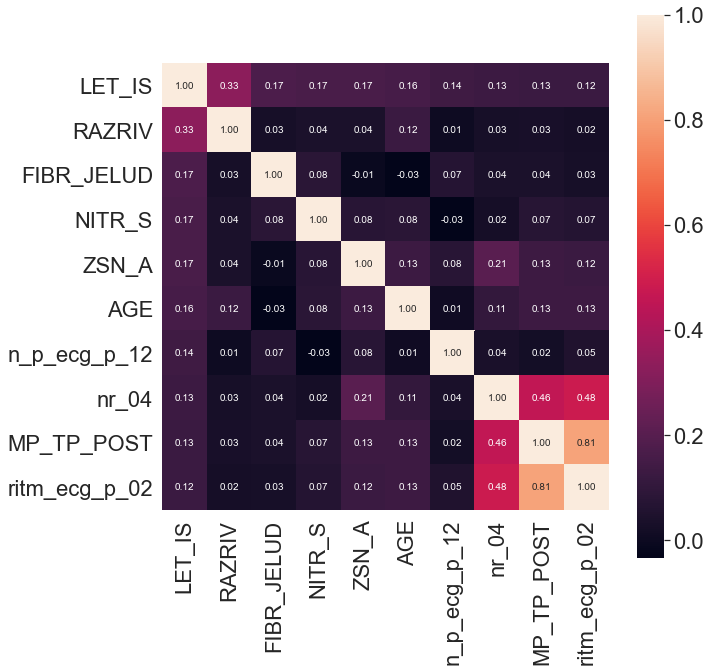

In [8]:
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'LET_IS')['LET_IS'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

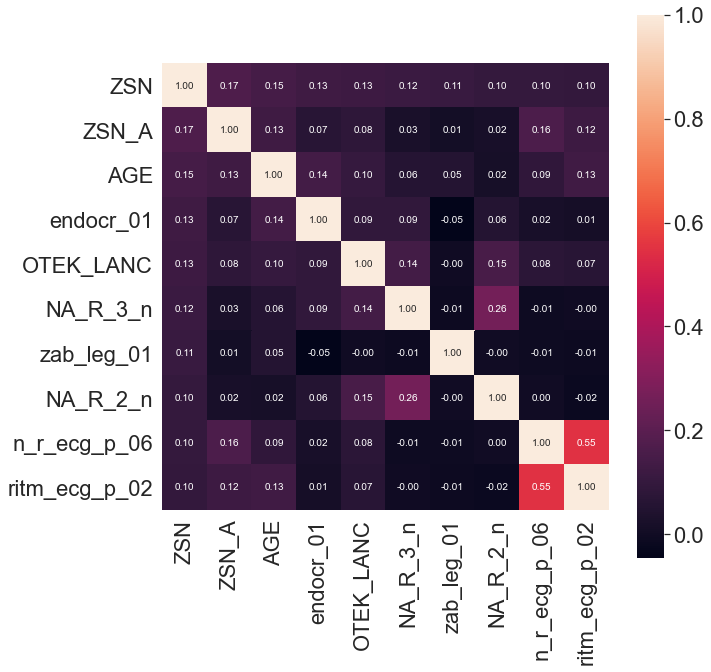

In [9]:
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ZSN')['ZSN'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

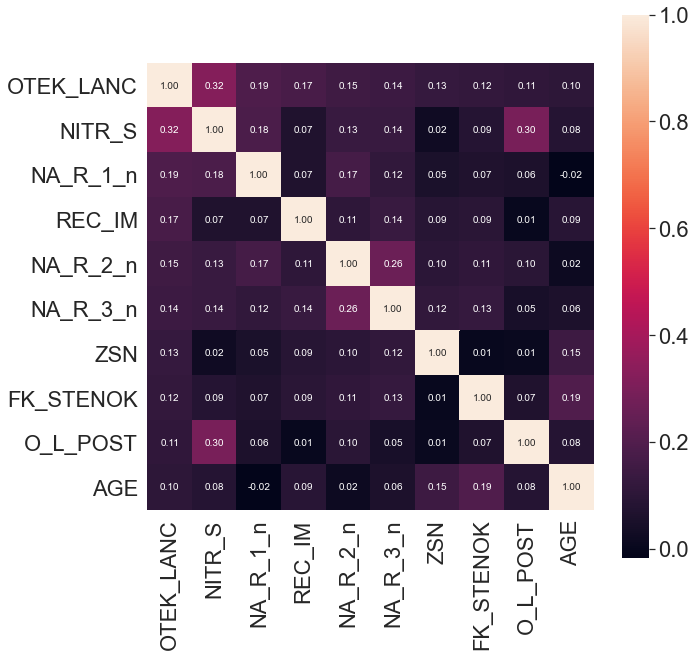

In [10]:
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'OTEK_LANC')['OTEK_LANC'].index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

# Check for imbalance - Target Variables

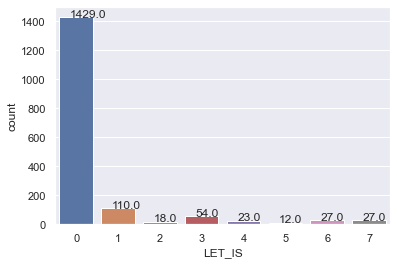

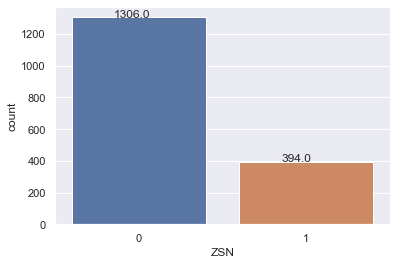

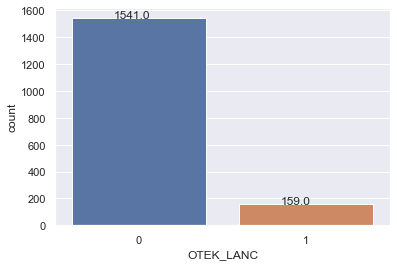

In [11]:
sns.set_theme(style="darkgrid")
ax1 = sns.countplot(x="LET_IS", data=df)
for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
sns.set_theme(style="darkgrid")
ax1 = sns.countplot(x="ZSN", data=df)
for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
sns.set_theme(style="darkgrid")
ax1 = sns.countplot(x="OTEK_LANC", data=df)
for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

PCA ANALYSIS 

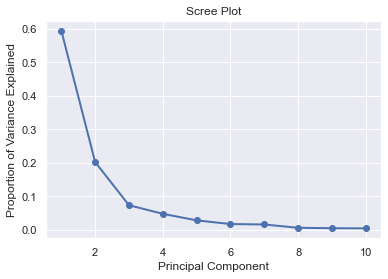

Total Explained Variance: 98.904 %


In [12]:
pca=PCA(10)
pca.fit_transform(df)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
total_var = pca.explained_variance_ratio_.sum() * 100
print("Total Explained Variance:",np.round(total_var,3),"%")

Selecting input and output components: 
Objective: To find the mortality and complications by the end of the third day (72 hours after admission to the hospital) all input columns (2-112) are used for prediction.

Out of the 12 complications (outputs) are listed below in columns 113-124, 3 were choosen for this analysis, 124:Lethal outcome (LET_IS), 121: Chronic heart failure (ZSN), and 118:Pulmonary edema (OTEK_LANC)

113. Atrial fibrillation (FIBR_PREDS)
114. Supraventricular tachycardia (PREDS_TAH): Nominal
115. Ventricular tachycardia (JELUD_TAH): Nominal
116. Ventricular fibrillation (FIBR_JELUD): Nominal
117. Third-degree AV block (A_V_BLOK): Nominal
118. Pulmonary edema (OTEK_LANC): Nominal
119. Myocardial rupture (RAZRIV): Nominal
120. Dressler syndrome (DRESSLER): Nominal
121. Chronic heart failure (ZSN): Nominal
122. Relapse of the myocardial infarction (REC_IM): Nominal
123. Post-infarction angina (P_IM_STEN): Nominal
124. Lethal outcome (cause) (LET_IS): Structure

In [13]:
df['LET_IS'].values[df['LET_IS'] > 0] = 1

In [14]:
X = df.iloc[:,0:112]
y = df[['LET_IS','ZSN','OTEK_LANC']]
y_lethal = df['LET_IS']
y_failure = df['ZSN']
y_edema = df['OTEK_LANC']
X.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS
0,77.0,1,2.0,1.0,1.0,2.0,0.375,3.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,0.375,2.0,0.0,2.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,0.375,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,60.0,1,0.0,0.0,0.0,2.0,0.375,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


7. Preprocessing the data using MinMaxscaler

In [15]:
scaler = StandardScaler()
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X), columns=X.columns)

8. Split the X and y into train and test sets

In [16]:
X_lethal_train, X_lethal_test, y_lethal_train, y_lethal_test = train_test_split(X, y_lethal, test_size=0.20, random_state=555)
X_failure_train, X_failure_test, y_failure_train, y_failure_test = train_test_split(X, y_failure, test_size=0.20, random_state=555)
X_edema_train, X_edema_test, y_edema_train, y_edema_test = train_test_split(X, y_edema, test_size=0.20, random_state=555)

Recursive feature elimination with cross validation and random forest classification: To find best features but also to find how many features needed for best accuracy

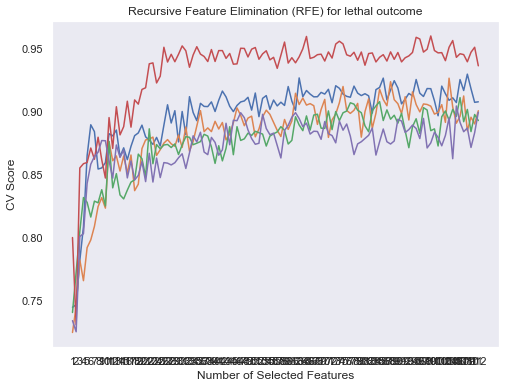

The optimal number of features for lethal outcome: 104


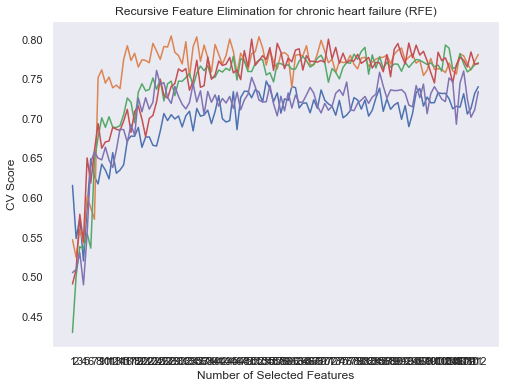

The optimal number of features for chronic heart failure: 85


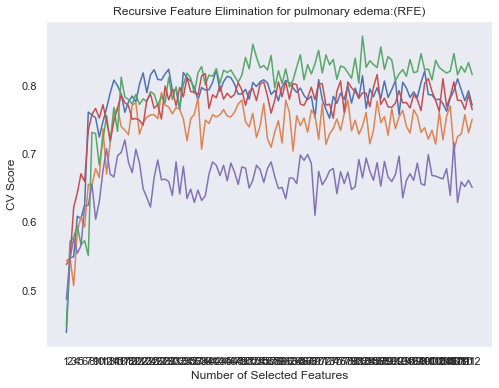

The optimal number of features for pulmonary edema: 86


In [17]:
from sklearn.feature_selection import RFECV

clf_rf = RandomForestClassifier(random_state=555) 
rfecv = RFECV(estimator=clf_rf, step=1, cv=StratifiedKFold(5),scoring='roc_auc')   
# rfecv.fit(X_lethal_train, y_lethal_train)
X_lethal_rfevc_train = rfecv.fit_transform(X_lethal_train,y_lethal_train)
X_lethal_train.iloc[:, rfecv.support_]
# print('Optimal number of features for Lethal Outcome :', rfecv.n_features_)
# print('Best features for Lethal Outcome:', X_lethal_train.columns[rfecv.support_])
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE) for lethal outcome")
plt.show()
print("The optimal number of features for lethal outcome: {}".format(rfecv.n_features_))

rfecv1 = RFECV(estimator=clf_rf, step=1, cv=StratifiedKFold(5),scoring='roc_auc')   
rfecv1 = rfecv1.fit(X_failure_train, y_failure_train)
# print('Optimal number of features for Heart Failure Outcome :', rfecv1.n_features_)
# print('Best features for Heart Failure Outcome:', X_failure_train.columns[rfecv1.support_])
rfecv1.transform(X_failure_train)
X_failure_rfe = X_failure_train.iloc[:, rfecv1.support_]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv1.grid_scores_)+1), rfecv1.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination for chronic heart failure (RFE)")
plt.show()
print("The optimal number of features for chronic heart failure: {}".format(rfecv1.n_features_))

rfecv2 = RFECV(estimator=clf_rf, step=1, cv=StratifiedKFold(5),scoring='roc_auc')   
rfecv2 = rfecv2.fit(X_edema_train, y_edema_train)
# print('Optimal number of features for Pulmonary Edema Outcome :', rfecv2.n_features_)
# print('Best features for Pulmonary Edema Outcome:', X_edema_train.columns[rfecv2.support_])
rfecv2.transform(X_edema_train)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv2.grid_scores_)+1), rfecv2.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination for pulmonary edema:(RFE)")
plt.show()
print("The optimal number of features for pulmonary edema: {}".format(rfecv2.n_features_))

#   9 Classification Models

In [18]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss',num_class= 1)
classifiers = [LR, RF, SVM, KNC, DTC, ABC, BC, GBC, clf_XGB]
log_cols=["Classifier", "Train Accuracy", "Test Accuracy", "Log Loss", "Precision Score","Recall Score","F1 Score" ]

# Prediction for Lethal Outcome using 9 Classification Models

LogisticRegression
****Results for Lethal Outcome****
Train CV Accuracy:85.500%
Test Accuracy: 87.400%
Precision Score : 85.700%
Recall Score : 87.400%
F1 Score : 0.862
Log Loss: 34.700%
RandomForestClassifier
****Results for Lethal Outcome****
Train CV Accuracy:90.800%
Test Accuracy: 93.500%
Precision Score : 93.700%
Recall Score : 93.500%
F1 Score : 0.928
Log Loss: 21.600%
SVC
****Results for Lethal Outcome****
Train CV Accuracy:85.100%
Test Accuracy: 87.600%
Precision Score : 87.600%
Recall Score : 87.600%
F1 Score : 0.836
Log Loss: 31.800%
KNeighborsClassifier
****Results for Lethal Outcome****
Train CV Accuracy:85.300%
Test Accuracy: 86.200%
Precision Score : 82.600%
Recall Score : 86.200%
F1 Score : 0.823
Log Loss: 199.400%
DecisionTreeClassifier
****Results for Lethal Outcome****
Train CV Accuracy:86.200%
Test Accuracy: 86.800%
Precision Score : 87.900%
Recall Score : 86.800%
F1 Score : 0.872
Log Loss: 457.100%
AdaBoostClassifier
****Results for Lethal Outcome****
Train CV Accur

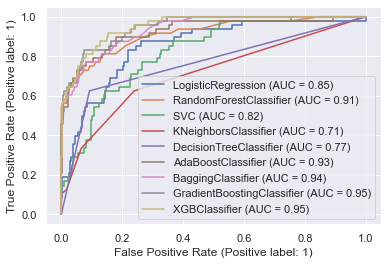

In [19]:
lethal = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_lethal_train, y_lethal_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    
    print('****Results for Lethal Outcome****')
    scores = sklearn.model_selection.cross_val_score(clf, X_lethal_train, y_lethal_train, cv=5, scoring="accuracy")
    tacc =np.round(scores.mean(),3)
    train_predictions_lethal = clf.predict(X_lethal_test)
    acc = np.round(accuracy_score(y_lethal_test, train_predictions_lethal),3)
    pre = np.round(precision_score(y_lethal_test,train_predictions_lethal,average='weighted'),3)
    rec= np.round(recall_score(y_lethal_test, train_predictions_lethal,average='weighted'),3)
    f = np.round(f1_score(y_lethal_test, train_predictions_lethal, average='weighted'),3)
    print("Train CV Accuracy:{:.3%}".format(tacc))
    print("Test Accuracy: {:.3%}".format(acc))
    print("Precision Score : {:.3%}".format(pre))
    print("Recall Score : {:.3%}".format(rec))
    print("F1 Score :",f )
          
    train_predictions_lethal = clf.predict_proba(X_lethal_test)
    ll = np.round(log_loss(y_lethal_test, train_predictions_lethal),3)
    print("Log Loss: {:.3%}".format(ll))
    
    log_entry_lethal = pd.DataFrame([[name, tacc*100, acc*100, ll, pre*100, rec*100, f]], columns=log_cols)
    lethal = lethal.append(log_entry_lethal)
    
print("="*30)
#roc curve
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_lethal_test, y_lethal_test, ax=ax)

Evaluating and Visualizing multiple models for Lethal Outcome

****Evaluation Results for Lethal Outcome****


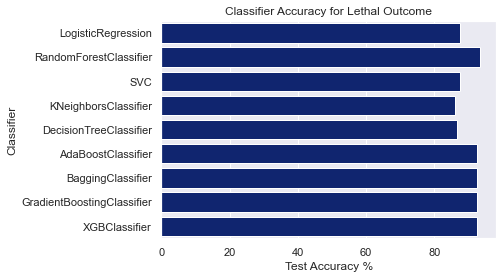

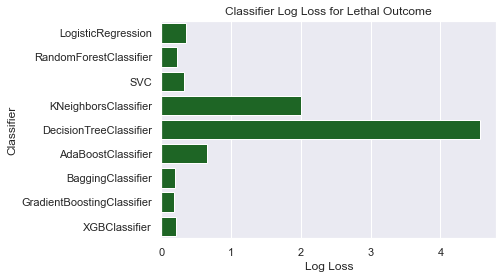

In [20]:
print('****Evaluation Results for Lethal Outcome****')
sns.set_color_codes("dark")
sns.barplot(x='Test Accuracy', y='Classifier', data=lethal, color="b")
plt.xlabel('Test Accuracy %')
plt.title('Classifier Accuracy for Lethal Outcome')
plt.show()

sns.set_color_codes("dark")
sns.barplot(x='Log Loss', y='Classifier', data=lethal, color="g")
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss for Lethal Outcome')
plt.show()

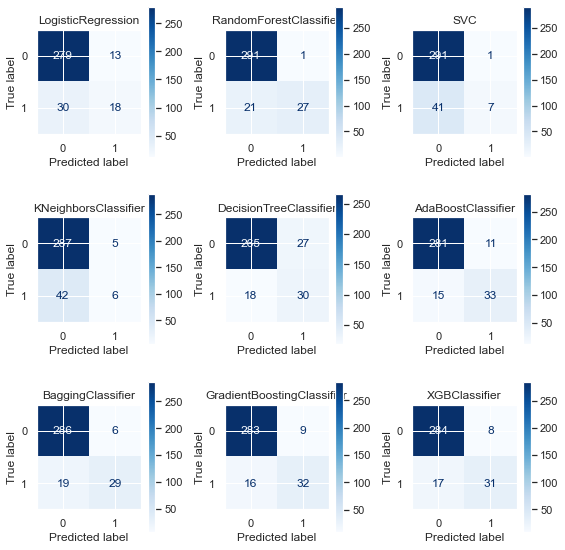

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(8,8))
from sklearn.metrics import plot_confusion_matrix
classifiers = [LR, RF, SVM, KNC, DTC, ABC, BC, GBC, clf_XGB]

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_lethal_test, 
                          y_lethal_test, 
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

# Prediction for Chronic Heart Failure using 9 Classification Models

LogisticRegression
****Results for Chronic Heart Failure Outcome****
Train CV Accuracy:75.100%
Test Accuracy: 77.100%
Precision Score : 71.800%
Recall Score : 77.100%
F1 Score : 0.733
Log Loss: 50.600%
RandomForestClassifier
****Results for Chronic Heart Failure Outcome****
Train CV Accuracy:79.300%
Test Accuracy: 81.200%
Precision Score : 79.500%
Recall Score : 81.200%
F1 Score : 0.758
Log Loss: 44.700%
SVC
****Results for Chronic Heart Failure Outcome****
Train CV Accuracy:75.900%
Test Accuracy: 79.100%
Precision Score : 70.000%
Recall Score : 79.100%
F1 Score : 0.707
Log Loss: 48.600%
KNeighborsClassifier
****Results for Chronic Heart Failure Outcome****
Train CV Accuracy:75.200%
Test Accuracy: 77.100%
Precision Score : 69.700%
Recall Score : 77.100%
F1 Score : 0.717
Log Loss: 249.400%
DecisionTreeClassifier
****Results for Chronic Heart Failure Outcome****
Train CV Accuracy:70.600%
Test Accuracy: 69.400%
Precision Score : 72.500%
Recall Score : 69.400%
F1 Score : 0.707
Log Loss: 10

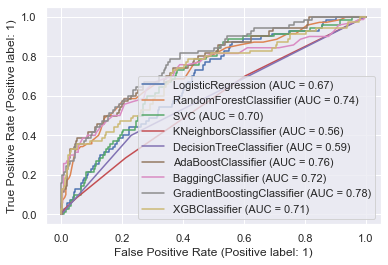

In [22]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss',num_class= 1)
classifiers = [LR, RF, SVM, KNC, DTC, ABC, BC, GBC, clf_XGB]
log_cols=["Classifier", "Train Accuracy", "Test Accuracy", "Log Loss", "Precision Score","Recall Score","F1 Score" ]
failure = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_failure_train, y_failure_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results for Chronic Heart Failure Outcome****')
    scores = sklearn.model_selection.cross_val_score(clf, X_failure_train, y_failure_train, cv=5, scoring="accuracy")
    tacc =np.round(scores.mean(),3)
    train_predictions = clf.predict(X_failure_test)
    acc = np.round(accuracy_score(y_failure_test, train_predictions),3)
    pre = np.round(precision_score(y_failure_test,train_predictions,average='weighted'),3)
    rec= np.round(recall_score(y_failure_test, train_predictions,average='weighted'),3)
    f = np.round(f1_score(y_failure_test, train_predictions, average='weighted'),3)
    print("Train CV Accuracy:{:.3%}".format(tacc))
    print("Test Accuracy: {:.3%}".format(acc))
    print("Precision Score : {:.3%}".format(pre))
    print("Recall Score : {:.3%}".format(rec))
    print("F1 Score :",f )
       
    
    train_predictions = clf.predict_proba(X_failure_test)
    ll = np.round(log_loss(y_failure_test, train_predictions),3)
    print("Log Loss: {:.3%}".format(ll))
    
    log_entry_failure = pd.DataFrame([[name, tacc*100, acc*100, ll, pre*100, rec*100, f]], columns=log_cols)
    failure = failure.append(log_entry_failure)
    
print("="*30)

ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_failure_test, y_failure_test, ax=ax)

Evaluating and Visualizing multiple models for Chronic Heart Failure

****Evaluation Results for Chronic Heart Failure Outcome****


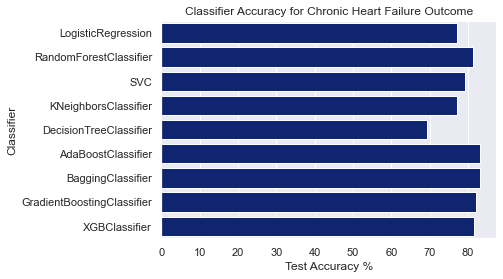

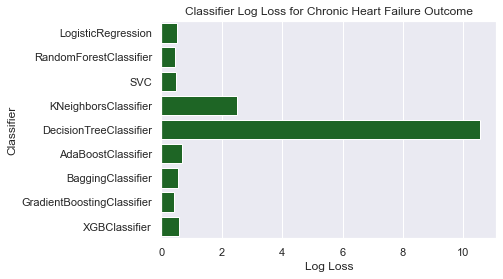

In [23]:
print('****Evaluation Results for Chronic Heart Failure Outcome****')
sns.set_color_codes("dark")
sns.barplot(x='Test Accuracy', y='Classifier', data=failure, color="b")
plt.xlabel('Test Accuracy %')
plt.title('Classifier Accuracy for Chronic Heart Failure Outcome')
plt.show()

sns.set_color_codes("dark")
sns.barplot(x='Log Loss', y='Classifier', data=failure, color="g")
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss for Chronic Heart Failure Outcome')
plt.show()

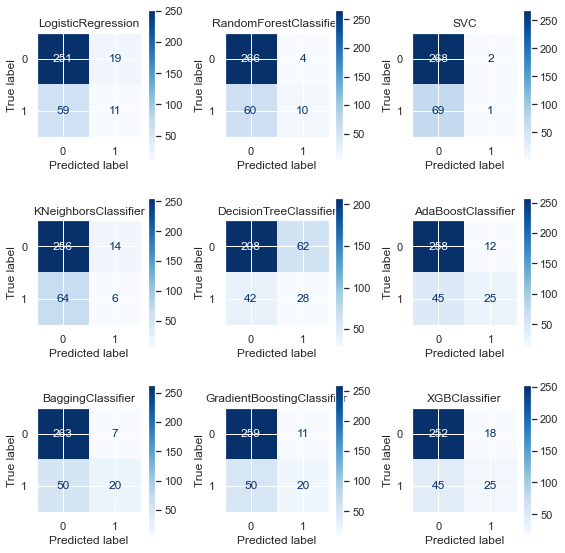

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(8,8))
from sklearn.metrics import plot_confusion_matrix
classifiers = [LR, RF, SVM, KNC, DTC, ABC, BC, GBC, clf_XGB]

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_failure_test, 
                          y_failure_test, 
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

# Prediction for Pulmonary Edema using 9 Classification Models

LogisticRegression
****Results for Pulmonary Edema Outcome****
Train CV Accuracy:87.900%
Test Accuracy: 89.000%
Precision Score : 88.600%
Recall Score : 89.400%
F1 Score : 0.89
Log Loss: 32.300%
RandomForestClassifier
****Results for Pulmonary Edema Outcome****
Train CV Accuracy:90.000%
Test Accuracy: 93.000%
Precision Score : 93.400%
Recall Score : 92.900%
F1 Score : 0.898
Log Loss: 23.500%
SVC
****Results for Pulmonary Edema Outcome****
Train CV Accuracy:90.100%
Test Accuracy: 93.000%
Precision Score : 85.800%
Recall Score : 92.600%
F1 Score : 0.891
Log Loss: 23.700%
KNeighborsClassifier
****Results for Pulmonary Edema Outcome****
Train CV Accuracy:89.700%
Test Accuracy: 93.000%
Precision Score : 93.400%
Recall Score : 92.900%
F1 Score : 0.898
Log Loss: 133.400%
DecisionTreeClassifier
****Results for Pulmonary Edema Outcome****
Train CV Accuracy:83.500%
Test Accuracy: 84.000%
Precision Score : 88.600%
Recall Score : 84.100%
F1 Score : 0.861
Log Loss: 548.600%
AdaBoostClassifier
****R

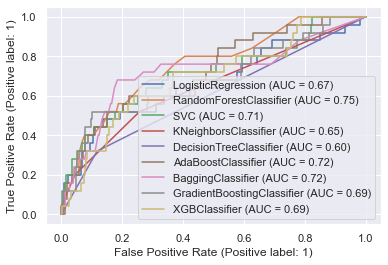

In [25]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, seed=555, use_label_encoder=False, eval_metric='logloss',num_class= 1)
classifiers = [LR, RF, SVM, KNC, DTC, ABC, BC, GBC, clf_XGB]
log_cols=["Classifier", "Train Accuracy", "Test Accuracy", "Log Loss", "Precision Score","Recall Score","F1 Score" ]
edema = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_edema_train, y_edema_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results for Pulmonary Edema Outcome****')
    scores = sklearn.model_selection.cross_val_score(clf, X_edema_train, y_edema_train, cv=5, scoring="accuracy")
    tacc =np.round(scores.mean(),3)
    train_predictions = clf.predict(X_edema_test)
    acc = np.round(accuracy_score(y_edema_test, train_predictions),2)
    pre = np.round(precision_score(y_edema_test,train_predictions,average='weighted'),3)
    rec= np.round(recall_score(y_edema_test, train_predictions,average='weighted'),3)
    f = np.round(f1_score(y_edema_test, train_predictions, average='weighted'),3)
    print("Train CV Accuracy:{:.3%}".format(tacc))
    print("Test Accuracy: {:.3%}".format(acc))
    print("Precision Score : {:.3%}".format(pre))
    print("Recall Score : {:.3%}".format(rec))
    print("F1 Score :",f )
           
    train_predictions = clf.predict_proba(X_edema_test)
    ll = np.round(log_loss(y_edema_test, train_predictions),3)
    print("Log Loss: {:.3%}".format(ll))
    
    log_entry_edema = pd.DataFrame([[name, tacc*100, acc*100, ll, pre*100, rec*100, f]], columns=log_cols)
    edema = edema.append(log_entry_edema)
    
print("="*30)

ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_edema_test, y_edema_test, ax=ax)

****Evaluation Results for Pulmonary Edema Outcome****


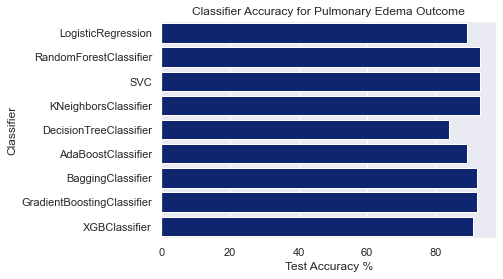

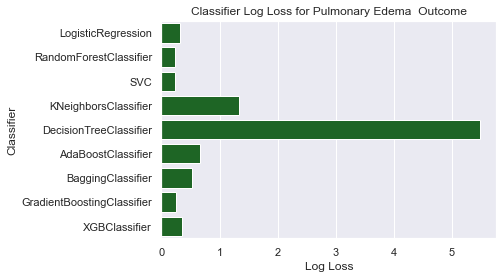

In [26]:
print('****Evaluation Results for Pulmonary Edema Outcome****')
sns.set_color_codes("dark")
sns.barplot(x='Test Accuracy', y='Classifier', data=edema, color="b")
plt.xlabel('Test Accuracy %')
plt.title('Classifier Accuracy for Pulmonary Edema Outcome')
plt.show()

sns.set_color_codes("dark")
sns.barplot(x='Log Loss', y='Classifier', data=edema, color="g")
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss for Pulmonary Edema  Outcome')
plt.show()

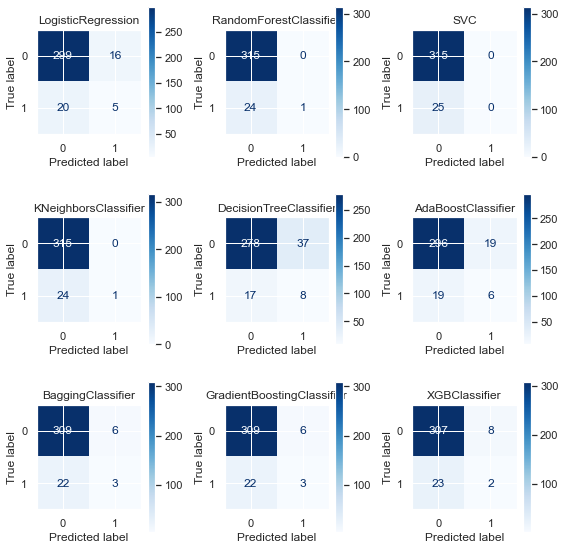

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(8,8))
from sklearn.metrics import plot_confusion_matrix
classifiers = [LR, RF, SVM, KNC, DTC, ABC, BC, GBC, clf_XGB]

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_edema_test, 
                          y_edema_test, 
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

Visualizating the evaluation matrix to tables

In [28]:
html = lethal.to_html()
text_file = open("lethal.html", "w")
text_file.write(html)
text_file.close()

html = edema.to_html()
text_file = open("edema.html", "w")
text_file.write(html)
text_file.close()

html = failure.to_html()
text_file = open("failure.html", "w")
text_file.write(html)
text_file.close()

In [29]:
from IPython.display import HTML
print(" Evaluation Metrics for Lethal Outcome")
HTML(filename='lethal.html')
# Best Models: RandomForestClassifier,SVC, LR

 Evaluation Metrics for Lethal Outcome


,Classifier,Train Accuracy,Test Accuracy,Log Loss,Precision Score,Recall Score,F1 Score
0,LogisticRegression,85.5,87.4,0.347,85.7,87.4,0.862
0,RandomForestClassifier,90.8,93.5,0.216,93.7,93.5,0.928
0,SVC,85.1,87.6,0.318,87.6,87.6,0.836
0,KNeighborsClassifier,85.3,86.2,1.994,82.6,86.2,0.823
0,DecisionTreeClassifier,86.2,86.8,4.571,87.9,86.8,0.872
0,AdaBoostClassifier,89.9,92.4,0.657,92.1,92.4,0.922
0,BaggingClassifier,90.4,92.6,0.197,92.2,92.6,0.922
0,GradientBoostingClassifier,90.4,92.6,0.186,92.3,92.6,0.924
0,XGBClassifier,91.3,92.6,0.208,92.3,92.6,0.923


17. Selecting the best models based on evaluation score 

In [30]:
print(" Evaluation Metrics for Chronic Heart Failure")
HTML(filename='failure.html')
# Best Models: RandomForestClassifier & SVC

 Evaluation Metrics for Chronic Heart Failure


,Classifier,Train Accuracy,Test Accuracy,Log Loss,Precision Score,Recall Score,F1 Score
0,LogisticRegression,75.1,77.1,0.506,71.8,77.1,0.733
0,RandomForestClassifier,79.3,81.2,0.447,79.5,81.2,0.758
0,SVC,75.9,79.1,0.486,70.0,79.1,0.707
0,KNeighborsClassifier,75.2,77.1,2.494,69.7,77.1,0.717
0,DecisionTreeClassifier,70.6,69.4,10.565,72.5,69.4,0.707
0,AdaBoostClassifier,78.0,83.2,0.679,81.5,83.2,0.811
0,BaggingClassifier,79.9,83.2,0.540,82.0,83.2,0.801
0,GradientBoostingClassifier,79.6,82.1,0.416,79.8,82.1,0.792
0,XGBClassifier,79.1,81.5,0.576,79.3,81.5,0.797


In [31]:
print(" Evaluation Metrics for Pulmonary Edema")
HTML(filename='edema.html')
# Best Models: LR, XGBClassifier, RandomForestClassifier, SVC, 

 Evaluation Metrics for Pulmonary Edema


,Classifier,Train Accuracy,Test Accuracy,Log Loss,Precision Score,Recall Score,F1 Score
0,LogisticRegression,87.9,89.0,0.323,88.6,89.4,0.890
0,RandomForestClassifier,90.0,93.0,0.235,93.4,92.9,0.898
0,SVC,90.1,93.0,0.237,85.8,92.6,0.891
0,KNeighborsClassifier,89.7,93.0,1.334,93.4,92.9,0.898
0,DecisionTreeClassifier,83.5,84.0,5.486,88.6,84.1,0.861
0,AdaBoostClassifier,87.4,89.0,0.656,88.8,88.8,0.888
0,BaggingClassifier,90.2,92.0,0.518,88.9,91.8,0.899
0,GradientBoostingClassifier,90.1,92.0,0.257,88.9,91.8,0.899
0,XGBClassifier,90.2,91.0,0.349,87.7,90.9,0.890


# Ensemble library for Lethal Outcome by combining the best model &  the second best model into a single layer

Ensemble method for Lethal Outcome

Fitting 2 layers
Processing layer-1             done | 00:00:02
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:02

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  1.0

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.9323529411764706

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.5416666666666666

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.9629629629629629
Fit data:
                             

,Predicted No,Predicted Yes
Actual No,291,1
Actual Yes,22,26



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


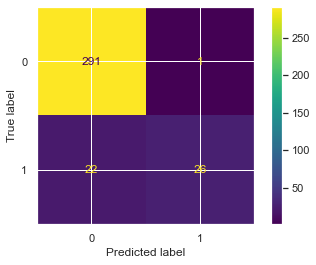

Classification report:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0,0.929712,0.996575,0.961983,292.000000
1,0.962963,0.541667,0.693333,48.000000
accuracy,0.932353,0.932353,0.932353,0.932353
macro avg,0.946338,0.769121,0.827658,340.000000
weighted avg,0.934407,0.932353,0.924056,340.000000


In [32]:
print("Ensemble method for Lethal Outcome")
ensemble_lethal = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble_lethal.add([RF, BC])
ensemble_lethal.add_meta(XGBClassifier())
ensemble_lethal.fit(X_lethal_train, y_lethal_train)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble_lethal.predict(X_lethal_train), y_lethal_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble_lethal.predict(X_lethal_test), y_lethal_test))
print("Precision:",metrics.precision_score(ensemble_lethal.predict(X_lethal_test), y_lethal_test))
print("Recall:",metrics.recall_score(ensemble_lethal.predict(X_lethal_test), y_lethal_test))
print("Fit data:\n%r" % ensemble_lethal.data)

cm_lethal=pd.DataFrame(confusion_matrix(y_lethal_test, ensemble_lethal.predict(X_lethal_test)),columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
    
display(cm_lethal)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_lethal_test, ensemble_lethal.predict(X_lethal_test)))
disp.plot()
plt.show()
print("Classification report:\n")
df_lethal_report = pd.DataFrame(classification_report(y_lethal_test, ensemble_lethal.predict(X_lethal_test), digits=2,
                                        output_dict=True)).T
df_lethal_report


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


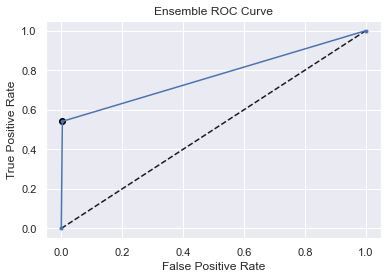


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score for Lethal Outcome: 0.76912100456621


In [33]:
fpr2, tpr2, thresholds2 = roc_curve(y_lethal_test, ensemble_lethal.predict(X_lethal_test))
gmeans_nb = np.sqrt(tpr2 * (1-fpr2))
ix_nb = np.argmax(gmeans_nb)
y_hat_nb = np.where(ensemble_lethal.predict(X_lethal_test) >= thresholds2[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, marker='.', label='ensemble')
plt.scatter(fpr2[ix_nb], tpr2[ix_nb], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.show()
auc = metrics.roc_auc_score(y_lethal_test, ensemble_lethal.predict(X_lethal_test))
print("Ensemble ROC-AUC score for Lethal Outcome:",auc)

# Ensemble library for Chronic Heart Failure by combining the best model &  the second best model into a single layer

Ensemble method for Chronic Heart Failure

Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:01

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.8580882352941176

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.8294117647058824

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.2714285714285714

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.7307692307692307
Fit data:
       

,Predicted No,Predicted Yes
Actual No,263,7
Actual Yes,51,19



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


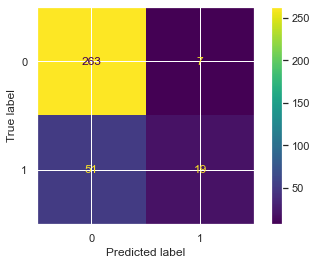

Classification report:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0,0.837580,0.974074,0.900685,270.000000
1,0.730769,0.271429,0.395833,70.000000
accuracy,0.829412,0.829412,0.829412,0.829412
macro avg,0.784174,0.622751,0.648259,340.000000
weighted avg,0.815589,0.829412,0.796745,340.000000


In [34]:
print("Ensemble method for Chronic Heart Failure")
ensemble_failure = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble_failure.add([GBC, ABC])
ensemble_failure.add_meta(XGBClassifier())
ensemble_failure.fit(X_failure_train, y_failure_train)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble_failure.predict(X_failure_train), y_failure_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble_failure.predict(X_failure_test), y_failure_test))
print("Precision:",metrics.precision_score(ensemble_failure.predict(X_failure_test), y_failure_test))
print("Recall:",metrics.recall_score(ensemble_failure.predict(X_failure_test), y_failure_test))
print("Fit data:\n%r" % ensemble_failure.data)

cm_failure=pd.DataFrame(confusion_matrix(y_failure_test, ensemble_failure.predict(X_failure_test)),columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
    
display(cm_failure)
disp_f = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_failure_test, ensemble_failure.predict(X_failure_test)))
disp_f.plot()
plt.show()
print("Classification report:\n")
df_failure_report = pd.DataFrame(classification_report(y_failure_test, ensemble_failure.predict(X_failure_test), digits=2,
                                        output_dict=True)).T
df_failure_report


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


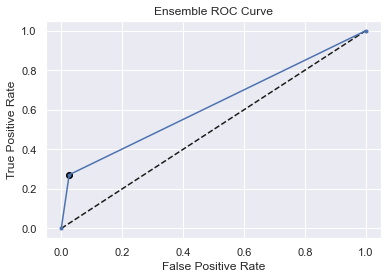


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score for Chronic Heart Failure: 0.6227513227513227


In [35]:
fpr, tpr, thresholds = roc_curve(y_failure_test, ensemble_failure.predict(X_failure_test))
gmeans_nb = np.sqrt(tpr * (1-fpr))
ix_nb_f = np.argmax(gmeans_nb)
y_hat_nb_f = np.where(ensemble_failure.predict(X_failure_test) >= thresholds[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label='ensemble')
plt.scatter(fpr[ix_nb_f], tpr[ix_nb_f], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.show()
auc_f = metrics.roc_auc_score(y_failure_test, ensemble_failure.predict(X_failure_test))
print("Ensemble ROC-AUC score for Chronic Heart Failure:",auc_f)

# Ensemble library for Pulmonary Edema by combining the best model &  second best model into a single layer

Ensemble method for Pulmonary Edema

Fitting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:02

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.9264705882352942
Accuracy - Test :  0.9264705882352942

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.0

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.0
Fit data:
                                   score-m 

,Predicted No,Predicted Yes
Actual No,315,0
Actual Yes,25,0



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


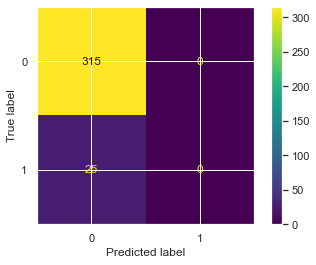

Classification report:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0,0.926471,1.000000,0.961832,315.000000
1,0.000000,0.000000,0.000000,25.000000
accuracy,0.926471,0.926471,0.926471,0.926471
macro avg,0.463235,0.500000,0.480916,340.000000
weighted avg,0.858348,0.926471,0.891109,340.000000


In [36]:
print("Ensemble method for Pulmonary Edema")
ensemble_edema = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble_edema.add([RF, clf_XGB])
ensemble_edema.add_meta(XGBClassifier())
ensemble_edema.fit(X_edema_train, y_edema_train)
acc_train = sklearn.metrics.accuracy_score(y_edema_test, ensemble_edema.predict(X_edema_test))
acc_test= sklearn.metrics.accuracy_score(y_edema_test, ensemble_edema.predict(X_edema_test))
print("Accuracy - Train : ", acc_train)
print("Accuracy - Test : ", acc_test)
print("Precision:",metrics.precision_score(y_edema_test, ensemble_edema.predict(X_edema_test)))
print("Recall:",metrics.recall_score(y_edema_test, ensemble_edema.predict(X_edema_test)))
print("Fit data:\n%r" % ensemble_edema.data)

cm_edema=pd.DataFrame(confusion_matrix(y_edema_test, ensemble_edema.predict(X_edema_test)),columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
    
display(cm_edema)
disp_e = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_edema_test, ensemble_edema.predict(X_edema_test)))
disp_e.plot()
plt.show()
print("Classification report:\n")
df_edema_report = pd.DataFrame(classification_report(y_edema_test, ensemble_edema.predict(X_edema_test), digits=2,
                                        output_dict=True)).T
df_edema_report


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


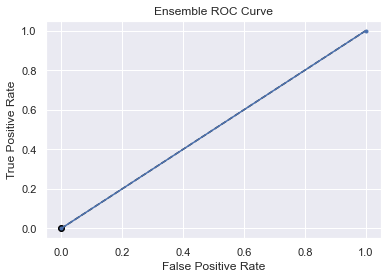


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score for edema: 0.5


In [37]:
fpr, tpr, thresholds = roc_curve(y_edema_test, ensemble_edema.predict(X_edema_test))
gmeans_nb = np.sqrt(tpr * (1-fpr))
ix_nb_f = np.argmax(gmeans_nb)
y_hat_nb_f = np.where(ensemble_edema.predict(X_edema_test) >= thresholds[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label='ensemble')
plt.scatter(fpr[ix_nb_f], tpr[ix_nb_f], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.show()
auc_e = metrics.roc_auc_score(y_edema_test, ensemble_edema.predict(X_edema_test))
print("Ensemble ROC-AUC score for edema:",auc_e)

# Balancing data using SMOTE

In [38]:
smt = SMOTE(random_state=555)
X_lethal_train_smote, y_lethal_train_smote = smt.fit_resample(X_lethal_train, y_lethal_train)
X_failure_train_smote, y_failure_train_smote = smt.fit_resample(X_failure_train, y_failure_train)
X_edema_train_smote, y_edema_train_smote = smt.fit_resample(X_edema_train, y_edema_train)

Visualization of balanced class after SMOTE

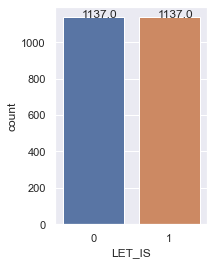

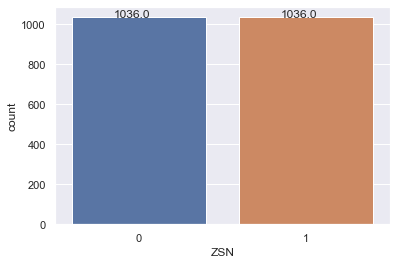

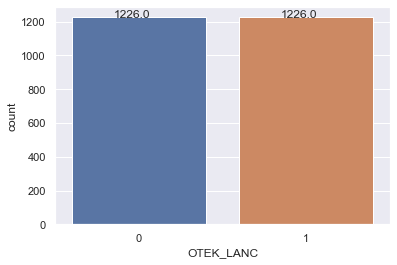

In [39]:
plt.subplot(1,2,1)
ax1=sns.countplot(y_lethal_train_smote)
for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
ax1=sns.countplot(y_failure_train_smote)
for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
ax1 =sns.countplot(y_edema_train_smote)
for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

# Ensemble method for Lethal Outcome after SMOTE

Ensemble method for Lethal Outcome after SMOTE

Fitting 2 layers
Processing layer-1             done | 00:00:03
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:03

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  1.0

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.9323529411764706

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.75

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.7659574468085106
Fit data:
                               

,Predicted No,Predicted Yes
Actual No,281,11
Actual Yes,12,36



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


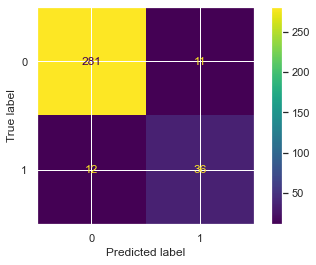

Classification report:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0,0.959044,0.962329,0.960684,292.000000
1,0.765957,0.750000,0.757895,48.000000
accuracy,0.932353,0.932353,0.932353,0.932353
macro avg,0.862501,0.856164,0.859289,340.000000
weighted avg,0.931785,0.932353,0.932055,340.000000


In [40]:
print("Ensemble method for Lethal Outcome after SMOTE")
ensemble_smote = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble_smote.add([BC,RF])
ensemble_smote.add_meta(XGBClassifier())
ensemble_smote.fit(X_lethal_train_smote, y_lethal_train_smote)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble_smote.predict(X_lethal_train_smote), y_lethal_train_smote))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble_smote.predict(X_lethal_test), y_lethal_test))
print("Precision:",metrics.precision_score(ensemble_smote.predict(X_lethal_test), y_lethal_test))
print("Recall:",metrics.recall_score(ensemble_smote.predict(X_lethal_test), y_lethal_test))
print("Fit data:\n%r" % ensemble_smote.data)

cm_smote=pd.DataFrame(confusion_matrix(y_lethal_test, ensemble_smote.predict(X_lethal_test)),columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
    
display(cm_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_lethal_test, ensemble_smote.predict(X_lethal_test)))
disp.plot()
plt.show()
print("Classification report:\n")
df_lethal_report_s = pd.DataFrame(classification_report(y_lethal_test, ensemble_smote.predict(X_lethal_test), digits=2,
                                        output_dict=True)).T
df_lethal_report_s


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


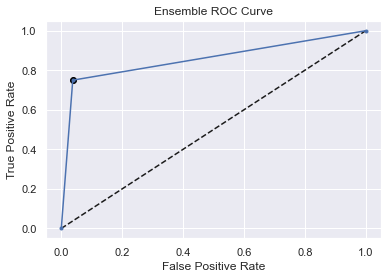


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score for Lethal Outcome after SMOTE: 0.8561643835616438


In [41]:
fpr2, tpr2, thresholds2 = roc_curve(y_lethal_test, ensemble_smote.predict(X_lethal_test))
gmeans_nb = np.sqrt(tpr2 * (1-fpr2))
ix_nb = np.argmax(gmeans_nb)
y_hat_nb = np.where(ensemble_smote.predict(X_lethal_test) >= thresholds2[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2, marker='.', label='ensemble')
plt.scatter(fpr2[ix_nb], tpr2[ix_nb], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.show()
auc = metrics.roc_auc_score(y_lethal_test, ensemble_smote.predict(X_lethal_test))
print("Ensemble ROC-AUC score for Lethal Outcome after SMOTE:",auc)

Ensemble method for Chronic Heart Failure after SMOTE

Fitting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:02

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.9218146718146718

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.8058823529411765

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.3

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.5526315789473685
Fit data:
          

,Predicted No,Predicted Yes
Actual No,253,17
Actual Yes,49,21



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


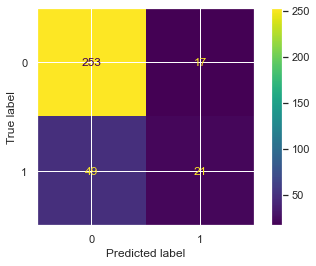

Classification report:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0,0.837748,0.937037,0.884615,270.000000
1,0.552632,0.300000,0.388889,70.000000
accuracy,0.805882,0.805882,0.805882,0.805882
macro avg,0.695190,0.618519,0.636752,340.000000
weighted avg,0.779048,0.805882,0.782554,340.000000


In [42]:
print("Ensemble method for Chronic Heart Failure after SMOTE")
ensemble_smote = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble_smote.add([ABC, GBC])
ensemble_smote.add_meta(XGBClassifier())
ensemble_smote.fit(X_failure_train_smote, y_failure_train_smote)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble_smote.predict(X_failure_train_smote), y_failure_train_smote))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble_smote.predict(X_failure_test), y_failure_test))
print("Precision:",metrics.precision_score(ensemble_smote.predict(X_failure_test), y_failure_test))
print("Recall:",metrics.recall_score(ensemble_smote.predict(X_failure_test), y_failure_test))
print("Fit data:\n%r" % ensemble_smote.data)

cm_smote=pd.DataFrame(confusion_matrix(y_failure_test, ensemble_smote.predict(X_failure_test)),columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
    
display(cm_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_failure_test, ensemble_smote.predict(X_failure_test)))
disp.plot()
plt.show()
print("Classification report:\n")
df_lethal_report_s = pd.DataFrame(classification_report(y_failure_test, ensemble_smote.predict(X_failure_test), digits=2,
                                        output_dict=True)).T
df_lethal_report_s


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


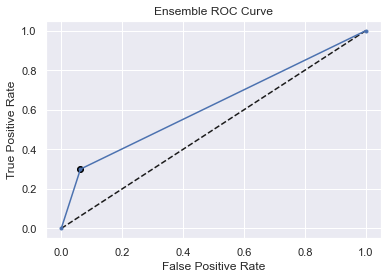


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score for Chronic Heart Failure after SMOTE: 0.6185185185185186


In [43]:
fpr, tpr, thresholds = roc_curve(y_failure_test, ensemble_smote.predict(X_failure_test))
gmeans_nb = np.sqrt(tpr * (1-fpr))
ix_nb_f = np.argmax(gmeans_nb)
y_hat_nb_f = np.where(ensemble_smote.predict(X_failure_test) >= thresholds[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label='ensemble')
plt.scatter(fpr[ix_nb_f], tpr[ix_nb_f], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.show()
auc_sf = metrics.roc_auc_score(y_failure_test, ensemble_smote.predict(X_failure_test))
print("Ensemble ROC-AUC score for Chronic Heart Failure after SMOTE:",auc_sf)

Ensemble method for Pulmonary Edema after SMOTE

Fitting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:02

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  1.0

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.9029411764705882

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.12

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.21428571428571427
Fit data:
                             

,Predicted No,Predicted Yes
Actual No,304,11
Actual Yes,22,3



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


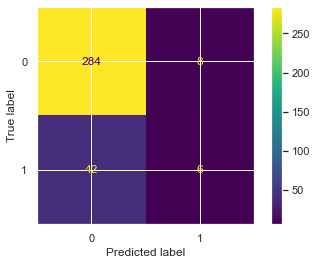

Classification report:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0,0.932515,0.965079,0.948518,315.000000
1,0.214286,0.120000,0.153846,25.000000
accuracy,0.902941,0.902941,0.902941,0.902941
macro avg,0.573401,0.542540,0.551182,340.000000
weighted avg,0.879704,0.902941,0.890086,340.000000


In [44]:
print("Ensemble method for Pulmonary Edema after SMOTE")
ensemble_smote = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble_smote.add([RF, clf_XGB])
ensemble_smote.add_meta(XGBClassifier())
ensemble_smote.fit(X_edema_train_smote, y_edema_train_smote)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble_smote.predict(X_edema_train_smote), y_edema_train_smote))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble_smote.predict(X_edema_test), y_edema_test))
print("Precision:",metrics.precision_score(ensemble_smote.predict(X_edema_test), y_edema_test))
print("Recall:",metrics.recall_score(ensemble_smote.predict(X_edema_test), y_edema_test))
print("Fit data:\n%r" % ensemble_smote.data)

cm_smote=pd.DataFrame(confusion_matrix(y_edema_test, ensemble_smote.predict(X_edema_test)),columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
    
display(cm_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_lethal_test, ensemble_smote.predict(X_edema_test)))
disp.plot()
plt.show()
print("Classification report:\n")
df_lethal_report_s = pd.DataFrame(classification_report(y_edema_test, ensemble_smote.predict(X_edema_test), digits=2,
                                        output_dict=True)).T
df_lethal_report_s


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


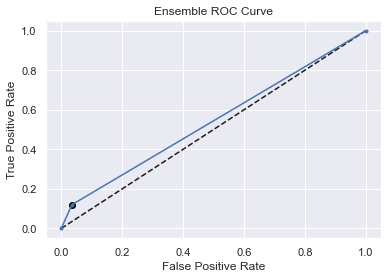


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score for Pulmonary Edema after SMOTE: 0.5425396825396827


In [45]:
fpr, tpr, thresholds = roc_curve(y_edema_test, ensemble_smote.predict(X_edema_test))
gmeans_nb = np.sqrt(tpr * (1-fpr))
ix_nb_f = np.argmax(gmeans_nb)
y_hat_nb_f = np.where(ensemble_smote.predict(X_edema_test) >= thresholds[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label='ensemble')
plt.scatter(fpr[ix_nb_f], tpr[ix_nb_f], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.show()
auc_sf = metrics.roc_auc_score(y_edema_test, ensemble_smote.predict(X_edema_test))
print("Ensemble ROC-AUC score for Pulmonary Edema after SMOTE:",auc_sf)

# Models after Recursive Feature Elimination (RFE) Implementation

# Lethal Outcome

In [46]:
df_lethal=df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_03', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS','LET_IS']]
X_lbest = df_lethal.drop(['LET_IS'], axis =1)
y_lbest = df['LET_IS']
X_lbest_train, X_lbest_test, y_lbest_train, y_lbest_test = train_test_split(X_lbest, y_lbest, test_size=0.20, random_state=555, stratify=y_lbest)


Ensemble method for Lethal Outcome with best features

Fitting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:01

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  1.0

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.9058823529411765

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.42592592592592593

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.9583333333333334
Fit data:
         

,Predicted No,Predicted Yes
Actual No,285,31
Actual Yes,1,23



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


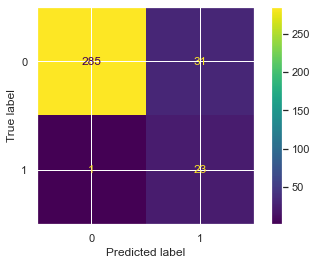

Classification report:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0.0,0.996503,0.901899,0.946844,316.000000
1.0,0.425926,0.958333,0.589744,24.000000
accuracy,0.905882,0.905882,0.905882,0.905882
macro avg,0.711215,0.930116,0.768294,340.000000
weighted avg,0.956227,0.905882,0.921637,340.000000


In [47]:
print("Ensemble method for Lethal Outcome with best features")
ensemble_best = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble_best.add([GBC, RF])
ensemble_best.add_meta(XGBClassifier())
ensemble_best.fit(X_lbest_train, y_lbest_train)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble_best.predict(X_lbest_train), y_lbest_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble_best.predict(X_lbest_test), y_lbest_test))
print("Precision:",metrics.precision_score(ensemble_best.predict(X_lbest_test), y_lbest_test))
print("Recall:",metrics.recall_score(ensemble_best.predict(X_lbest_test), y_lbest_test))
print("Fit data:\n%r" % ensemble_best.data)

cm=pd.DataFrame(confusion_matrix(ensemble_best.predict(X_lbest_test), y_lbest_test),columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
    
display(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ensemble_best.predict(X_lbest_test), y_lbest_test))
disp.plot()
plt.show()
print("Classification report:\n")
df_lbest_report = pd.DataFrame(classification_report(ensemble_best.predict(X_lbest_test), y_lbest_test, digits=2,
                                        output_dict=True)).T
df_lbest_report


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


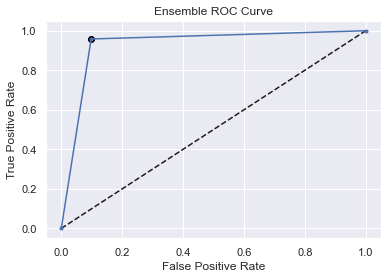


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score for Lethal Outcome with best features: 0.7112147112147112


In [48]:
fpr, tpr, thresholds = roc_curve(ensemble_best.predict(X_lbest_test), y_lbest_test)
gmeans_nb = np.sqrt(tpr * (1-fpr))
ix_nb = np.argmax(gmeans_nb)
y_hat_nb = np.where(ensemble_best.predict(X_lbest_test) >= thresholds[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label='ensemble')
plt.scatter(fpr[ix_nb], tpr[ix_nb], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.show()
auc = metrics.roc_auc_score(y_lbest_test, ensemble_best.predict(X_lbest_test))
print("Ensemble ROC-AUC score for Lethal Outcome with best features:",auc)

# Chronic heart failure

In [49]:
df_failure=df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK','IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_03', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS','ZSN']]

In [50]:
X_fbest = df_failure.drop(['ZSN'], axis =1)
y_fbest = df['ZSN']
X_fbest_train, X_fbest_test, y_fbest_train, y_fbest_test = train_test_split(X_fbest, y_fbest, test_size=0.20, random_state=555)

Ensemble method for Chornic Heart Failure with best features

Fitting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:02

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.8823529411764706

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.8176470588235294

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.2857142857142857

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.625
Fit data:
 

,Predicted No,Predicted Yes
Actual No,258,50
Actual Yes,12,20



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


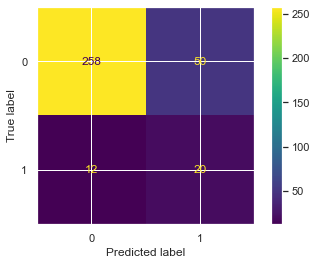

Classification report:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0.0,0.955556,0.837662,0.892734,308.000000
1.0,0.285714,0.625000,0.392157,32.000000
accuracy,0.817647,0.817647,0.817647,0.817647
macro avg,0.620635,0.731331,0.642445,340.000000
weighted avg,0.892512,0.817647,0.845620,340.000000


In [51]:
print("Ensemble method for Chornic Heart Failure with best features")
ensemble_best = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble_best.add([GBC, ABC])
ensemble_best.add_meta(XGBClassifier())
ensemble_best.fit(X_fbest_train, y_fbest_train)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble_best.predict(X_fbest_train), y_fbest_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble_best.predict(X_fbest_test), y_fbest_test))
print("Precision:",metrics.precision_score(ensemble_best.predict(X_fbest_test), y_fbest_test))
print("Recall:",metrics.recall_score(ensemble_best.predict(X_fbest_test), y_fbest_test))
print("Fit data:\n%r" % ensemble_best.data)

cm =pd.DataFrame(confusion_matrix(ensemble_best.predict(X_fbest_test), y_fbest_test),columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
    
display(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ensemble_best.predict(X_fbest_test), y_fbest_test))
disp.plot()
plt.show()
print("Classification report:\n")
df_report = pd.DataFrame(classification_report(ensemble_best.predict(X_fbest_test), y_fbest_test, digits=2,
                                        output_dict=True)).T
df_report


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


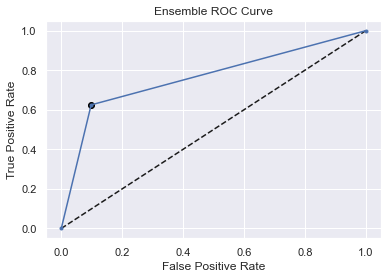


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score for Chronic heart failure with best features: 0.6206349206349205


In [52]:
pr, tpr, thresholds = roc_curve(ensemble_best.predict(X_fbest_test), y_fbest_test)
gmeans_nb = np.sqrt(tpr * (1-fpr))
ix_nb = np.argmax(gmeans_nb)
y_hat_nb = np.where(ensemble_best.predict(X_fbest_test) >= thresholds[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label='ensemble')
plt.scatter(fpr[ix_nb], tpr[ix_nb], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.show()
auc_f = metrics.roc_auc_score(y_fbest_test, ensemble_best.predict(X_fbest_test))
print("Ensemble ROC-AUC score for Chronic heart failure with best features:",auc_f)

# Pulmonary edema

In [53]:
df_edema=df[['AGE', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB',
       'DLIT_AG', 'ZSN_A', 'nr_04', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
       'D_AD_ORIT', 'K_SH_POST', 'ant_im', 'lat_im', 'inf_im', 'ritm_ecg_p_01',
       'n_p_ecg_p_12', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD',
       'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n',
       'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
       'NA_R_3_n', 'NOT_NA_2_n', 'NOT_NA_3_n','OTEK_LANC']]

In [54]:
X_ebest = df_edema.drop(['OTEK_LANC'], axis =1)
y_ebest = df['OTEK_LANC']
X_ebest_train, X_ebest_test, y_ebest_train, y_ebest_test = train_test_split(X_ebest, y_ebest, test_size=0.20, random_state=555)

Ensemble method for Pulmonary Edema with best features

Fitting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:01

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.9602941176470589

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.9264705882352942

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Precision: 0.04

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Recall: 0.5
Fit data:
                       

,Predicted No,Predicted Yes
Actual No,314,24
Actual Yes,1,1



Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


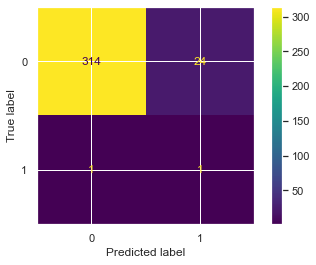

Classification report:


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


,precision,recall,f1-score,support
0.0,0.996825,0.928994,0.961715,338.000000
1.0,0.040000,0.500000,0.074074,2.000000
accuracy,0.926471,0.926471,0.926471,0.926471
macro avg,0.518413,0.714497,0.517895,340.000000
weighted avg,0.991197,0.926471,0.956494,340.000000


In [55]:
print("Ensemble method for Pulmonary Edema with best features")
ensemble_best = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble_best.add([RF, GBC])
ensemble_best.add_meta(XGBClassifier())
ensemble_best.fit(X_ebest_train, y_ebest_train)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble_best.predict(X_ebest_train), y_ebest_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble_best.predict(X_ebest_test), y_ebest_test))
print("Precision:",metrics.precision_score(ensemble_best.predict(X_ebest_test), y_ebest_test))
print("Recall:",metrics.recall_score(ensemble_best.predict(X_ebest_test), y_ebest_test))
print("Fit data:\n%r" % ensemble_best.data)

cm =pd.DataFrame(confusion_matrix(ensemble_best.predict(X_ebest_test), y_ebest_test),columns=['Predicted No', 'Predicted Yes'],
    index=['Actual No', 'Actual Yes'])
    
display(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(ensemble_best.predict(X_ebest_test), y_ebest_test))
disp.plot()
plt.show()
print("Classification report:\n")
df_report = pd.DataFrame(classification_report(ensemble_best.predict(X_ebest_test), y_ebest_test, digits=2,
                                        output_dict=True)).T
df_report


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


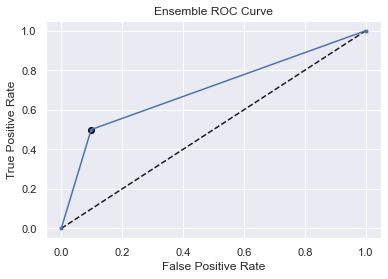


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Ensemble ROC-AUC score for Pulmonary edema Outcome with best features: 0.7144970414201183


In [56]:
pr, tpr, thresholds = roc_curve(ensemble_best.predict(X_ebest_test), y_ebest_test)
gmeans_nb = np.sqrt(tpr * (1-fpr))
ix_nb = np.argmax(gmeans_nb)
y_hat_nb = np.where(ensemble_best.predict(X_ebest_test) >= thresholds[ix_nb], 1, 0)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, marker='.', label='ensemble')
plt.scatter(fpr[ix_nb], tpr[ix_nb], marker='o', color='black', label='Best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble ROC Curve')
plt.show()
auc_f = metrics.roc_auc_score(ensemble_best.predict(X_ebest_test), y_ebest_test)
print("Ensemble ROC-AUC score for Pulmonary edema Outcome with best features:",auc_f)